In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pylab import *
import seaborn as sns
import scipy.stats as stats

In [2]:
# Import data from csv files
lung_df = pd.read_csv(os.path.join("Output", "Cleaned_CDC_Data.csv"))
county_df = pd.read_csv(os.path.join("Output", "Cleaned_CDC_County_Data.csv"))

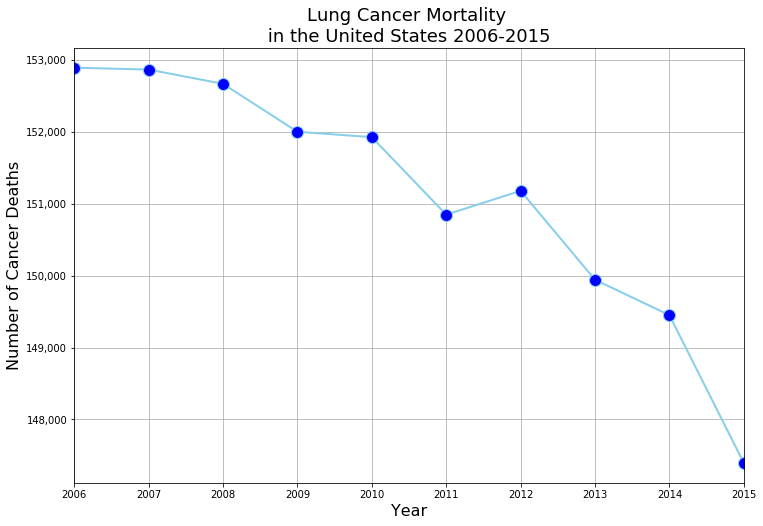

In [3]:
# Create a line graph of lung cancer mortality on a national level/nationwide over time from 2006-2015.

Group_By_Year_df = lung_df.groupby('Year')['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=12
                                                                   ,color='skyblue'
                                                                   ,linewidth=2
                                                                   , figsize = (12,8))


Group_By_Year_df.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.figure(figsize =()) 
plt.title('Lung Cancer Mortality \n in the United States 2006-2015 ',fontsize = 18)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Number of Cancer Deaths',fontsize = 16)
plt.grid(True)
plt.show()


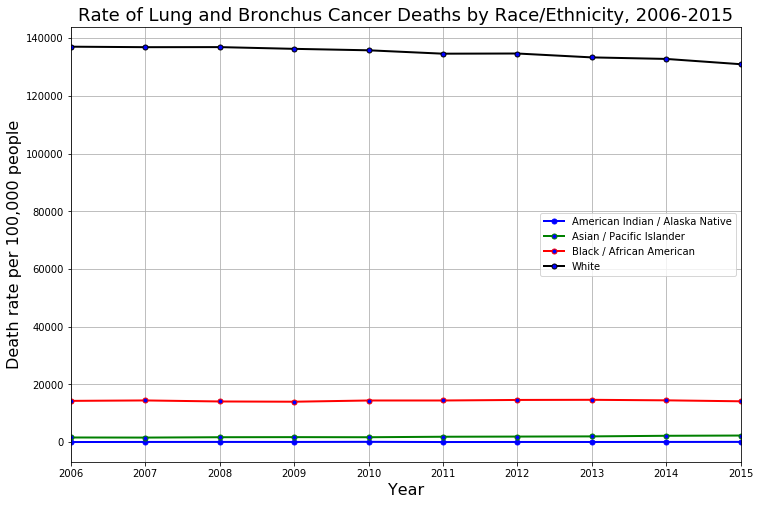

In [4]:
#Group data by Race
GroupBy_by_Race_df = lung_df.groupby('Race')

#Extract data into four seprate DataFrames based on race 
American_Indian_df = GroupBy_by_Race_df.get_group('American Indian or Alaska Native')
Asian_df = GroupBy_by_Race_df.get_group('Asian or Pacific Islander')                                              
African_American_df = GroupBy_by_Race_df.get_group('Black or African American')
White_df = GroupBy_by_Race_df.get_group('White')

plt.figure(figsize =(12,8))
American_Indian_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='blue'
                                                                   ,linewidth=2) 

Asian_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='green'
                                                                   ,linewidth=2)

African_American_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='red'
                                                                   ,linewidth=2)

White_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='black'
                                                                   ,linewidth=2)

plt.xlabel('Year',fontsize = 16)
plt.ylabel('Death rate per 100,000 people',fontsize = 16)
plt.title('Lung and Cancer Deaths by Race/Ethnicity, 2006-2015', fontsize = 18)
plt.grid(True)

plt.legend(('American Indian / Alaska Native', 'Asian / Pacific Islander', 'Black / African American','White'),
           loc='best')
plt.show()


<Figure size 576x432 with 0 Axes>

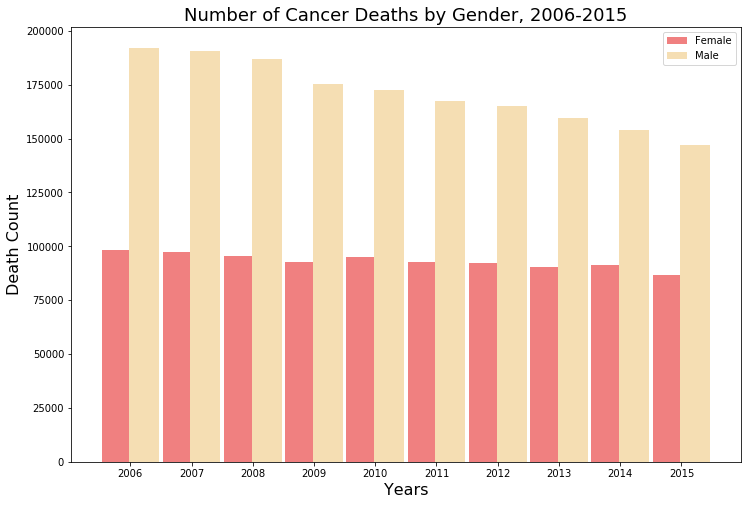

In [6]:
#Group data by gender
GroupBy_by_Gender_df = lung_df.groupby('Sex')

#Extract data into two seprate DataFrames based on gender
GroupBy_by_Female_df = GroupBy_by_Gender_df.get_group('Female')
GroupBy_by_Male_df = GroupBy_by_Gender_df.get_group('Male')  

#Group data by Year and Death per 100,000 people
Group_Fe_Yr_Dth=GroupBy_by_Female_df.groupby(['Year'])['Crude Rate'].sum()
Group_Ma_Yr_Dth=GroupBy_by_Male_df.groupby(['Year'])['Crude Rate'].sum()

#New Dictionary w/ year and corresponding male/female counts
dict={'femaleCount':Group_Fe_Yr_Dth,
      'maleCount'  :Group_Ma_Yr_Dth}
Fe_Ma_df =pd.DataFrame(dict)


plt.figure(figsize =(8,6))

#Positioning
barWidth = .45
r1 = np.arange(2006,2016,1)
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize =(12,8))
ax = fig.add_subplot(111)
ax.bar(r1, Group_Fe_Yr_Dth,width=0.49,color='lightcoral',align='center')
ax.bar(r2, Group_Ma_Yr_Dth,width=0.49,color='wheat',align='center')
#plt.grid()
ax.set_xlabel('Years',fontsize = 16)
ax.set_ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Gender, 2006-2015',fontsize = 18)
plt.legend(('Female', 'Male'),loc='upper right')
plt.xticks(r1+barWidth/2,range(2006,2016))
   
plt.show()


### Number of Cancer Deaths by Age Group, All Races, Both Sexes, 2006-2015

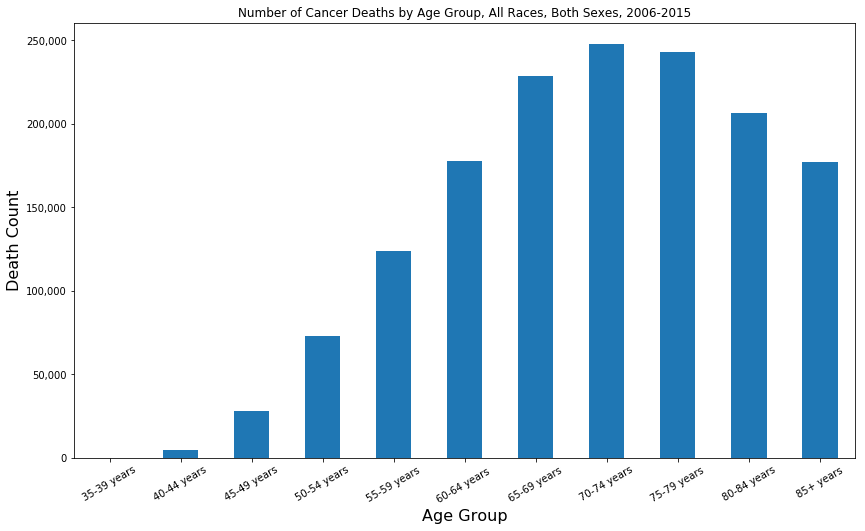

In [7]:
lung_df_02 = lung_df.copy()
# The death rate for age group below 35 is found to be ~ 0
# plot those records that have death rate > 0
lung_df_02=lung_df_02[lung_df_02['Deaths'] > 0].set_index('Age Group')

#Group data by Age and get the total number of deaths per age group
GroupBy_by_Age_df = lung_df_02.groupby('Age Group')['Deaths'].sum() 

#
plt.figure(figsize =(14,8))
Death_Count_Group_By_Age =GroupBy_by_Age_df.plot.bar(x='Age Group', y='Deaths', rot=30)
plt.xlabel('Age Group',fontsize = 16)  
plt.ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Age Group, All Races, Both Sexes, 2006-2015')
Death_Count_Group_By_Age.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.grid(False)
